In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar


In [2]:
df = pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022-test-10222023.csv', delimiter=',', skiprows=0, low_memory=False)
df = df.drop(columns=['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])

In [12]:
df_validation_cdb = pd.read_csv(r'../../results/validation-vs-computed-fuel-rates-clean-cdb-oct2021-sep2022-test-10222023.csv', delimiter=',', skiprows=0, low_memory=False)
df_validation_heb = pd.read_csv(r'../../results/validation-vs-computed-fuel-rates-clean-heb-oct2021-sep2022-test-10222023.csv', delimiter=',', skiprows=0, low_memory=False)

In [13]:
df_validation_cdb

,Unnamed: 0,index,Vehicle,Qty,ServiceDateTime,Meter1Reading,Fuel Orfluid Type,Powertrain,dist,Energy
0,1,4406,1510,47.80,2021-10-02 22:09:00,749640,DIE,conventional,207.931139,42.925994
1,2,4407,1510,41.29,2021-10-04 20:38:00,749855,DIE,conventional,92.159452,30.073185
2,3,4408,1510,34.32,2021-10-05 18:01:00,750014,DIE,conventional,131.497501,28.176150
3,4,4409,1510,32.53,2021-10-06 17:55:00,750153,DIE,conventional,90.106508,30.797076
4,5,4410,1510,42.12,2021-10-07 18:53:00,750316,DIE,conventional,148.106750,37.261817
...,...,...,...,...,...,...,...,...,...,...
25227,26317,4400,7817,22.90,2022-09-23 21:03:00,10158,DIE,conventional,80.329228,19.021746
25228,26318,4401,7817,31.60,2022-09-26 19:05:00,10400,DIE,conventional,118.934424,29.788982
25229,26319,4402,7817,18.30,2022-09-27 19:20:00,10472,DIE,conventional,52.336930,13.464578
25230,26320,4403,7817,10.90,2022-09-28 20:23:00,10539,DIE,conventional,52.846481,14.786316


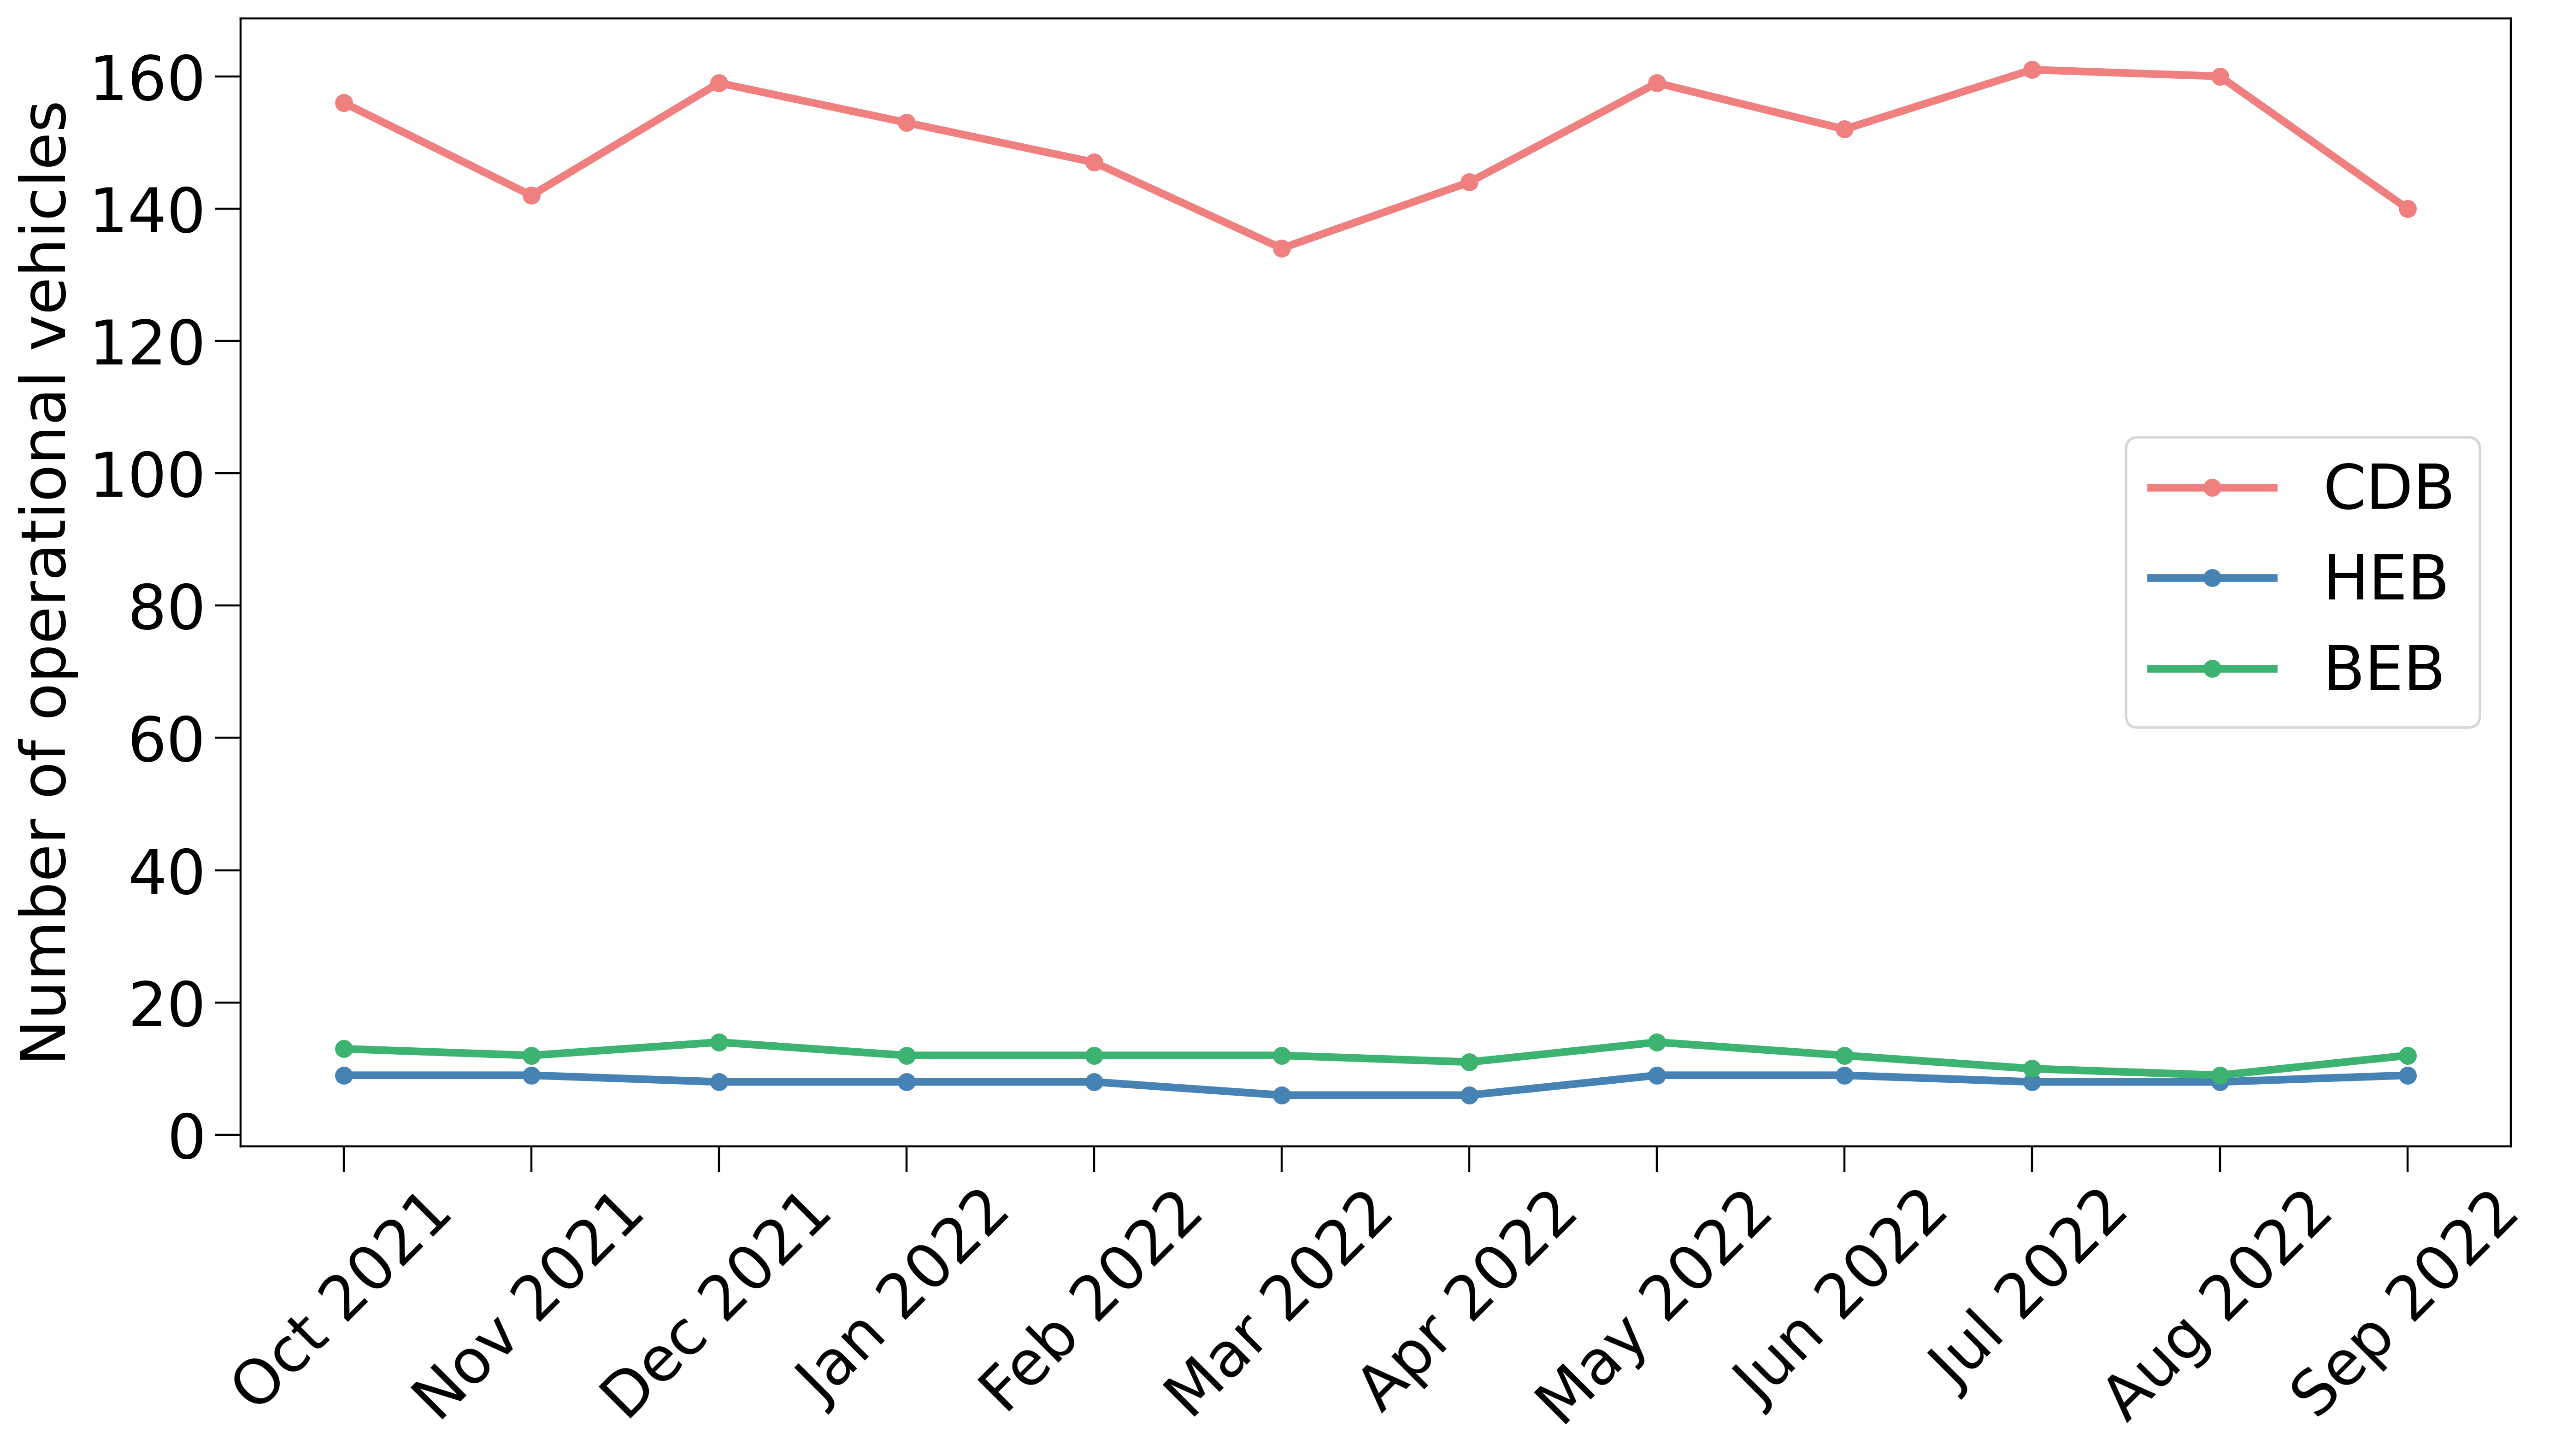

In [4]:
# Mapping month integers to month names
df['ServiceDateTime'] = pd.to_datetime(df['ServiceDateTime'])
df['Month'] = df['ServiceDateTime'].dt.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

# Group by 'Month' and 'Powertrain', and count unique 'Vehicle' IDs
monthly_counts = df.groupby(['Month', 'Powertrain'])['Vehicle'].nunique().unstack(fill_value=0).reset_index()

# Month-year labels (adjust these based on your data)
month_order_with_year = ['Oct 2021', 'Nov 2021', 'Dec 2021', 
                         'Jan 2022', 'Feb 2022', 'Mar 2022', 
                         'Apr 2022', 'May 2022', 'Jun 2022', 
                         'Jul 2022', 'Aug 2022', 'Sep 2022']

powertrain_colors = {
    'conventional': 'lightcoral',
    'hybrid': 'steelblue',
    'electric': 'mediumseagreen'
}


# Mapping from month names to month-year labels
month_to_monthyear = {month: month_year for month, month_year in zip(calendar.month_name[1:], month_order_with_year)}

# Apply the mapping to the 'Month' column in monthly_counts
monthly_counts['Month'] = monthly_counts['Month'].map(month_to_monthyear)

# Plot setup
fig, ax = plt.subplots(figsize=(14, 8), dpi=400)

# Plotting each powertrain type
for powertrain, color in powertrain_colors.items():
    label = 'CDB' if powertrain == 'conventional' else ('HEB' if powertrain == 'hybrid' else 'BEB')
    ax.plot(monthly_counts['Month'], monthly_counts[powertrain], marker='o', label=label, color=color, lw=3)

# Adding labels and title
ax.set_ylabel('Number of operational vehicles', fontsize=24)

# Customize the legend
ax.legend(fontsize=24)

# Set x-ticks and x-tick labels
ax.set_xticks(range(len(month_order_with_year)))
ax.set_xticklabels(month_order_with_year, rotation=45, fontsize=20)

# Improve y-axis appearance
ax.tick_params(axis='y', labelsize=20)

# Increase size of tick marks and labels
tick_mark_size = 10  # Adjust as needed
tick_label_size = 24  # Adjust as needed
ax.tick_params(axis='both', labelsize=tick_label_size, length=tick_mark_size)  # Adjust both x and y axes


# Adjust layout and save the plot
plt.tight_layout()
fig.savefig(r'../../figures/operational-fleet.png', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()

In [5]:
# Convert 'ServiceDateTime' from string to datetime
df_validation_cdb['ServiceDateTime'] = pd.to_datetime(df_validation_cdb['ServiceDateTime'])
df_validation_heb['ServiceDateTime'] = pd.to_datetime(df_validation_heb['ServiceDateTime'])

# Create a 'Month' column by extracting the month from 'ServiceDateTime'
df_validation_cdb['Month'] = df_validation_cdb['ServiceDateTime'].dt.month
df_validation_heb['Month'] = df_validation_heb['ServiceDateTime'].dt.month

# Mapping month integers to month names
df_validation_cdb['Month'] = df_validation_cdb['Month'].apply(lambda x: calendar.month_name[x])
df_validation_heb['Month'] = df_validation_heb['Month'].apply(lambda x: calendar.month_name[x])

df_combined = pd.concat([df_validation_cdb, df_validation_heb], ignore_index=True)

df_combined=df_combined.loc[df_combined['Energy']!=0]


monthly_avg_energy = df_combined.groupby(['Month', 'Powertrain', 'Vehicle'])['Energy'].sum().reset_index()

# Group by 'Month' and 'Powertrain', and calculate the average 'Energy' per unique 'Vehicle'
monthly_avg_energy = monthly_avg_energy.groupby(['Month', 'Powertrain'])['Energy'].mean().reset_index()

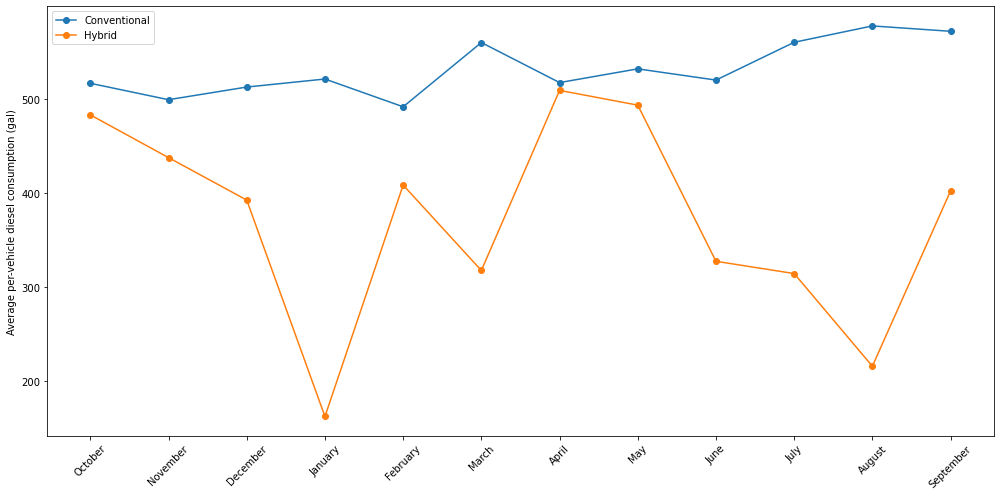

In [6]:
# Now, let's calculate the average per vehicle energy consumption for each month
monthly_avg_energy = monthly_avg_energy.groupby(['Month', 'Powertrain'])['Energy'].mean().reset_index()

# Pivot the result to get 'Powertrain' as columns, 'Month' as rows, and 'Energy' as values
monthly_avg_energy_pivot = monthly_avg_energy.pivot_table(index='Month', columns='Powertrain', values='Energy')

# Sort the pivot table by our custom month order
month_order = ['October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
monthly_avg_energy_pivot = monthly_avg_energy_pivot.reindex(month_order)

# Now let's plot the time series
plt.figure(figsize=(14, 7))
for powertrain in monthly_avg_energy_pivot.columns:
    plt.plot(monthly_avg_energy_pivot.index, monthly_avg_energy_pivot[powertrain], marker='o', label=powertrain.capitalize())

#plt.title('Average per vehicle diesel consumption by Month')
plt.ylabel('Average per-vehicle diesel consumption (gal)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_3708\3984925189.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=20)


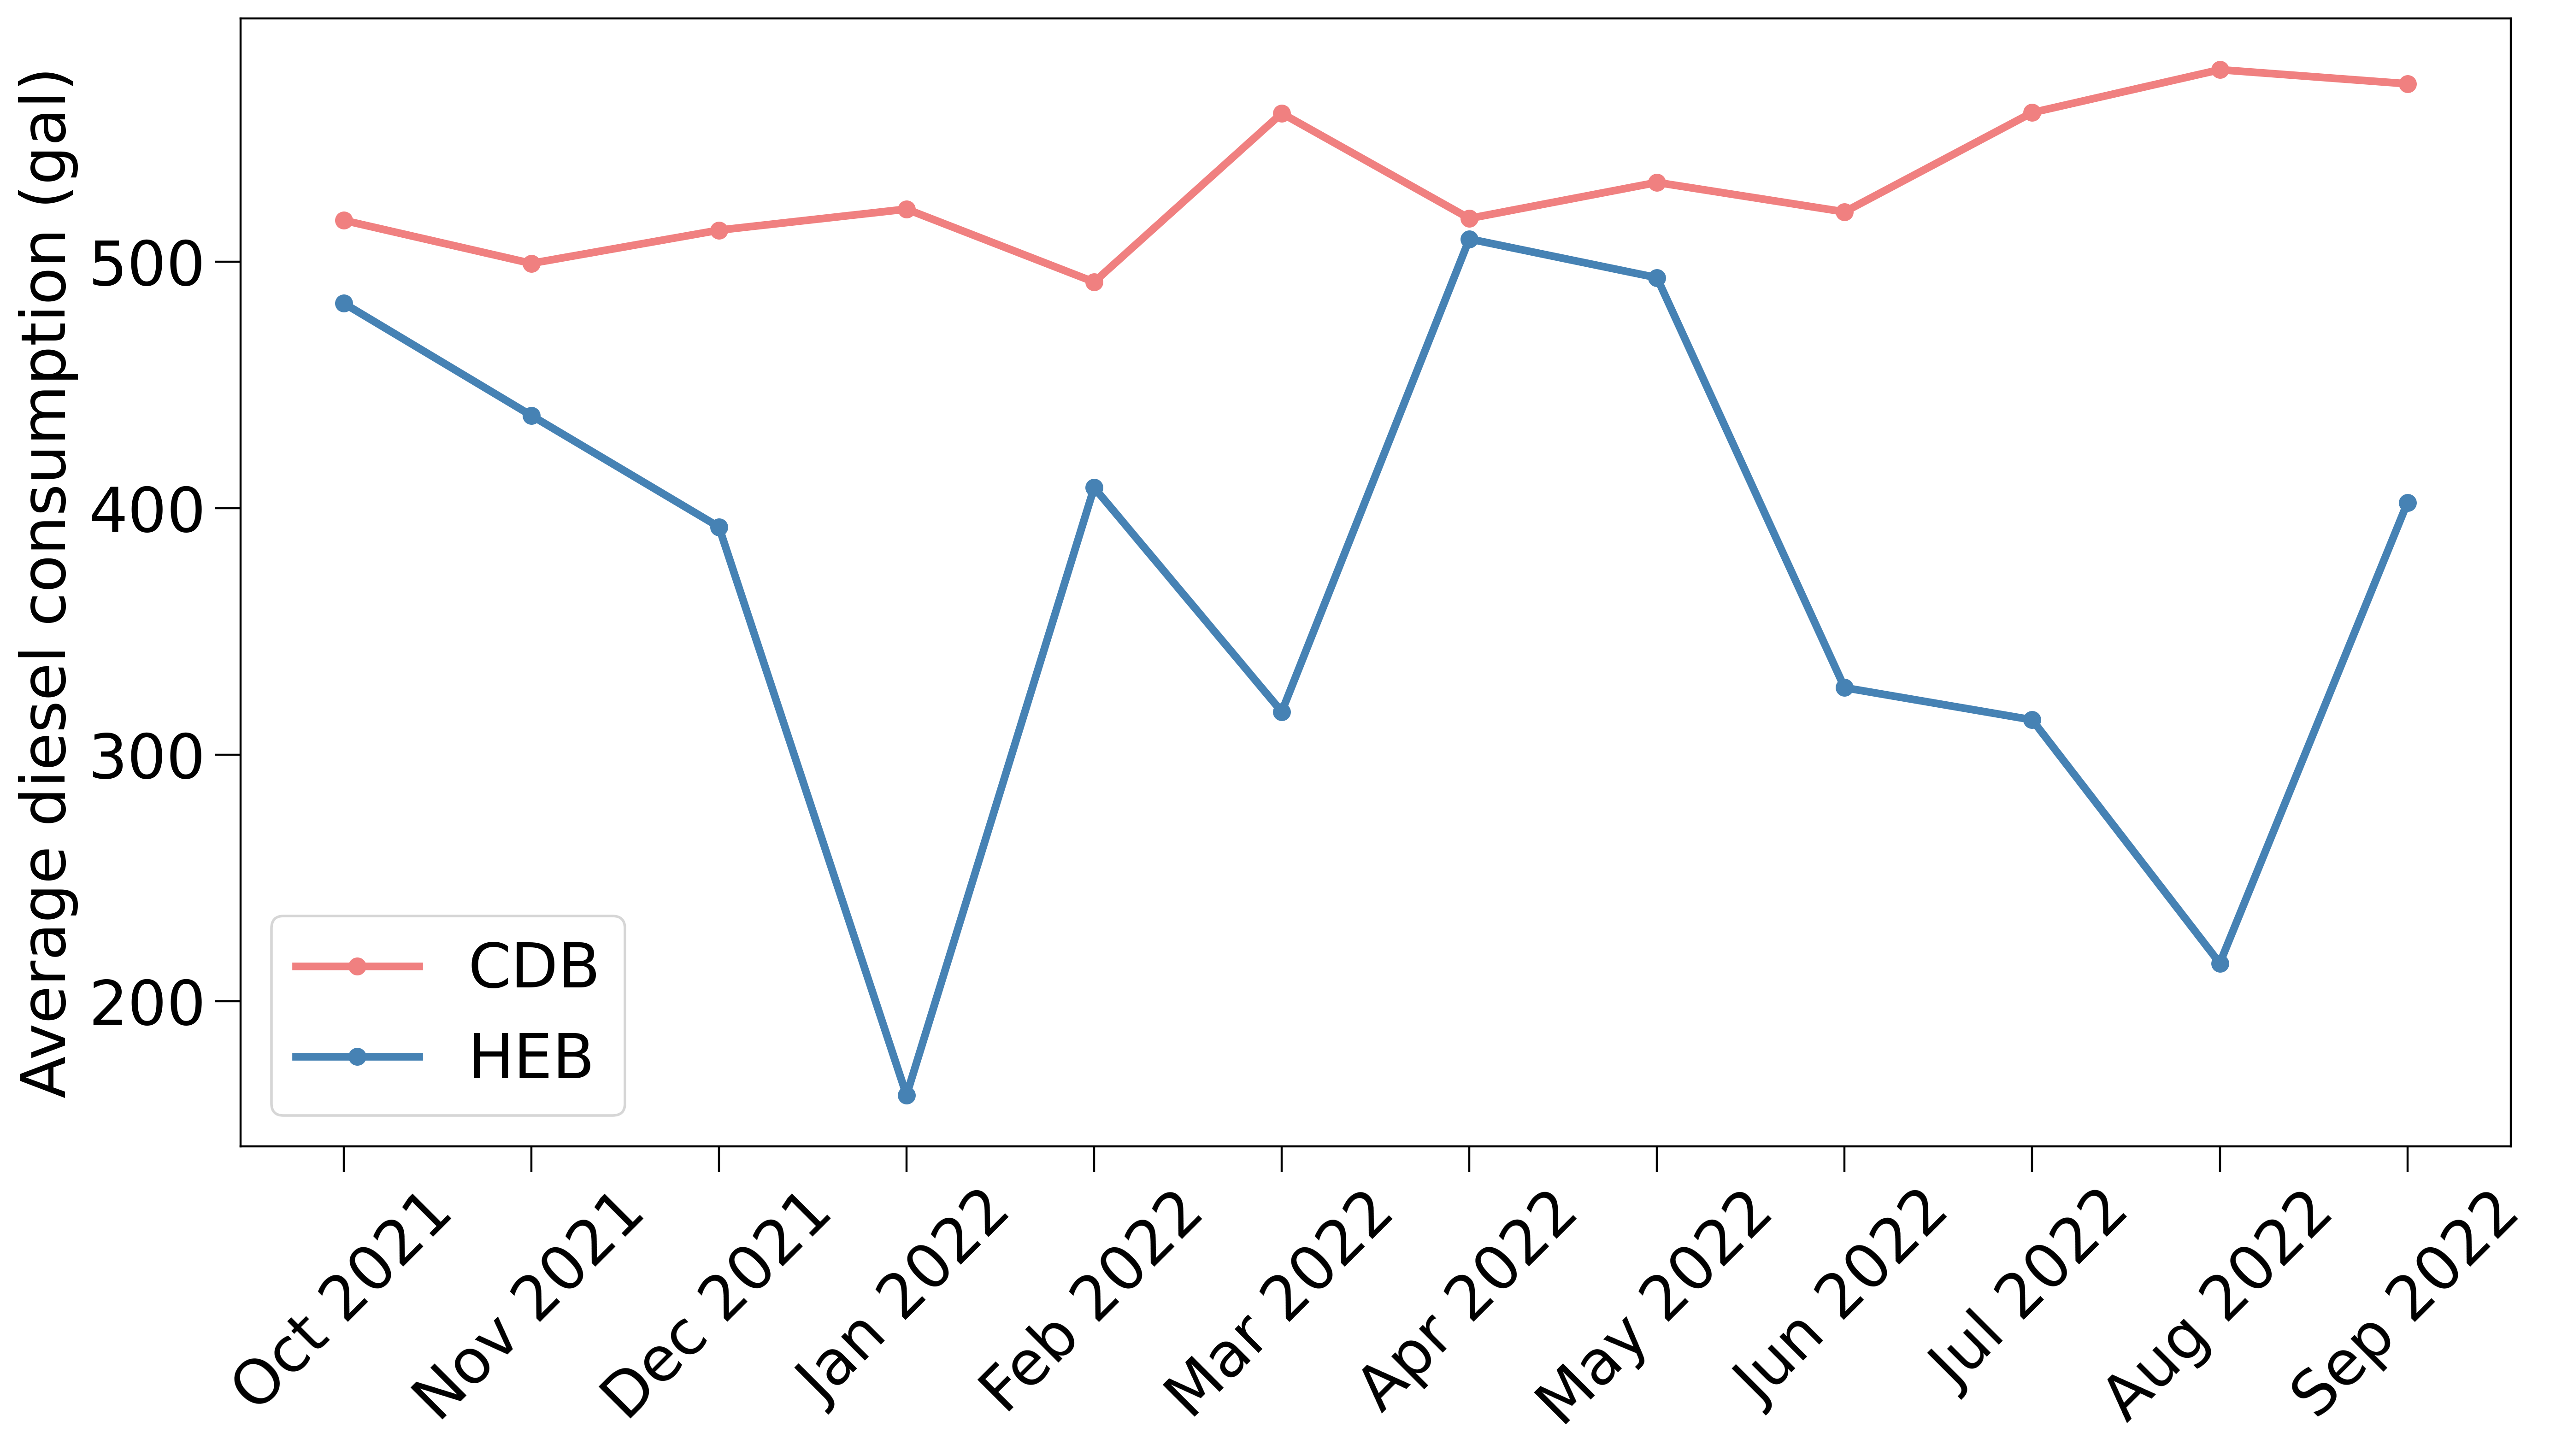

In [7]:
import matplotlib.ticker as mticker

# Let's create the full month-year labels for the x-axis.
month_order_with_year = ['Oct 2021', 'Nov 2021', 'Dec 2021', 
                         'Jan 2022', 'Feb 2022', 'Mar 2022', 
                         'Apr 2022', 'May 2022', 'Jun 2022', 
                         'Jul 2022', 'Aug 2022', 'Sep 2022']

# Mapping to the new month-year labels.
month_to_monthyear = {month: month_year for month, month_year in zip(month_order, month_order_with_year)}
monthly_avg_energy_pivot = monthly_avg_energy_pivot.rename(index=month_to_monthyear)

# Create figure and axis.
fig, ax = plt.subplots(figsize=(14, 8), dpi=400)

# Plot the time series with the new labels and line specifications.
for powertrain, color in zip(monthly_avg_energy_pivot.columns, ['lightcoral', 'steelblue']):
    ax.plot(monthly_avg_energy_pivot.index, monthly_avg_energy_pivot[powertrain], marker='o', 
            label='CDB' if powertrain == 'conventional' else 'HEB', color=color, lw=3)

# Increase size of tick marks and labels
tick_mark_size = 10  # Adjust as needed
tick_label_size = 24  # Adjust as needed
    
# Setting the labels for the plot.
ax.set_ylabel('Average diesel consumption (gal)', fontsize=24)
ax.set_xticks(np.arange(len(month_order_with_year)))
ax.set_xticklabels(month_order_with_year, rotation=45, fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=20)
ax.tick_params(axis='both', labelsize=tick_label_size, length=tick_mark_size)  # Adjust both x and y axes


# Format y-axis labels to remove decimals
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda val, pos: f'{int(val)}'))


# Customizing the legend.
ax.legend(fontsize=24)

# Adjust layout to not cut off labels and save the plot.
plt.tight_layout()
fig.savefig(r'../../figures/average-per-bus-diesl-consumption-real.png', dpi=400, bbox_inches='tight')

# Show the plot.
plt.show()

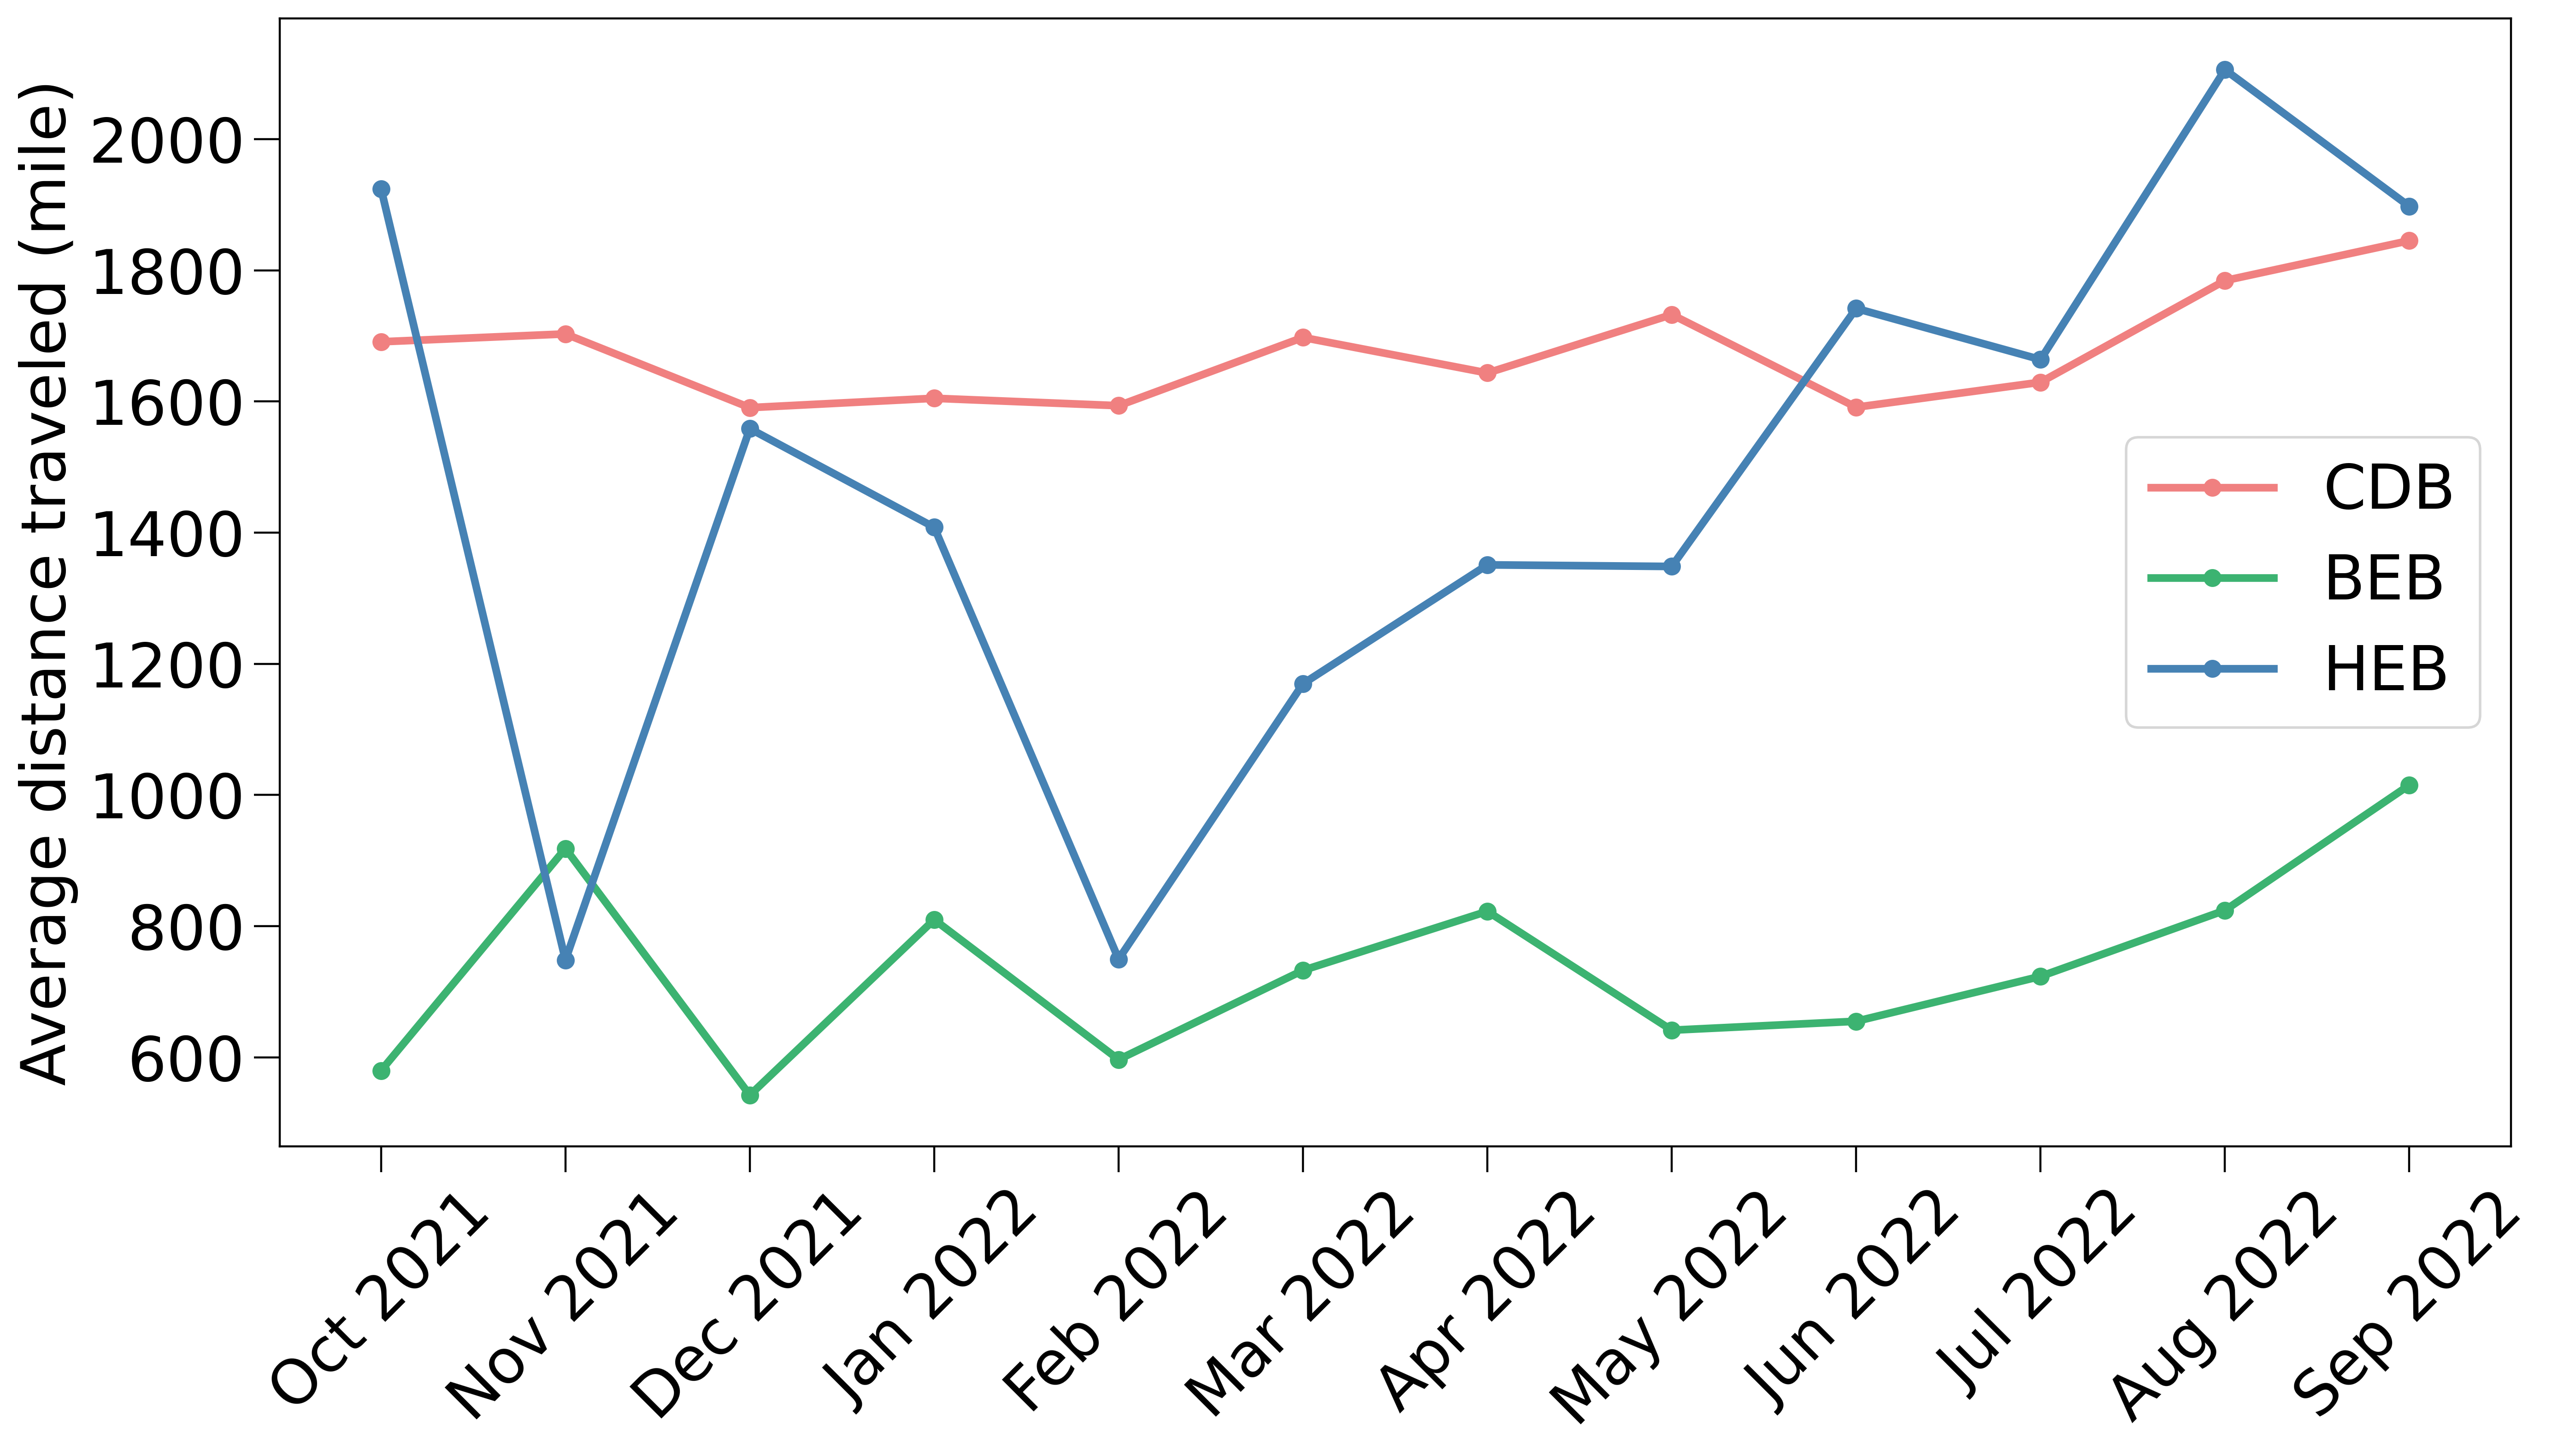

In [8]:
df_filtered=df.loc[df['dist']!=0]

monthly_avg_dist = df_filtered.groupby(['Month', 'Powertrain', 'Vehicle'])['dist'].sum().reset_index()

monthly_avg_dist = monthly_avg_dist.groupby(['Month', 'Powertrain'])['dist'].mean().reset_index()

pivot_df = monthly_avg_dist.pivot(index='Month', columns='Powertrain', values='dist')


# Assuming 'monthly_counts' is your DataFrame after necessary processing

# Define the month-year labels
#month_order_with_year = ['Oct 2021', 'Nov 2021', 'Dec 2021', 
#                         'Jan 2022', 'Feb 2022', 'Mar 2022', 
#                         'Apr 2022', 'May 2022', 'Jun 2022', 
#                         'Jul 2022', 'Aug 2022', 'Sep 2022']

# Define a mapping of month names to numbers (making sure January starts at 1)
#month_to_number = {name: num for num, name in enumerate(calendar.month_name[1:], start=1)}

# Create a reverse mapping of 'month year' format to month names (assuming pivot_df['Month'] contains short month names)
#month_year_to_monthname = {month: calendar.month_abbr[month_to_number[month.split()[0]]] for month in month_order_with_year}

# Map the 'Month' in pivot_df to the month-year labels and reorder the index
#pivot_df = pivot_df.rename(index=month_year_to_monthname).reindex(month_order_with_year)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 8), dpi=400)

# Define the colors for each powertrain type
powertrain_colors = {
    'conventional': 'lightcoral',
    'hybrid': 'steelblue',
    'electric': 'mediumseagreen'
}

# Plotting each powertrain type with markers
for powertrain in pivot_df.columns:
    ax.plot(pivot_df.index, pivot_df[powertrain], color=powertrain_colors[powertrain], marker='o',  lw=3, 
            label='CDB' if powertrain == 'conventional' else 'HEB' if powertrain == 'hybrid' else 'BEB' if powertrain == 'electric' else powertrain)

# Adding labels and title
ax.set_ylabel('Average distance traveled (mile)', fontsize=24)

# Customize the legend
ax.legend(fontsize=24)

# Increase size of tick marks and labels
tick_mark_size = 10  # Adjust as needed
tick_label_size = 24  # Adjust as needed

# Setting x-axis labels to month-year
ax.set_xticks(np.arange(len(month_order_with_year)))
ax.set_xticklabels(month_order_with_year, rotation=45, fontsize=24)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='both', labelsize=tick_label_size, length=tick_mark_size)  # Adjust both x and y axes


# Adjust layout to fit everything nicely.
plt.tight_layout()

# Save the plot - Make sure to use a valid path
fig.savefig(r'../../figures/distance-travelled-by-powertrain.png', dpi=400, bbox_inches='tight')


# Show the plot
plt.show()


In [9]:
pivot_df

Powertrain,conventional,electric,hybrid
Month,,,
April,1690.953996,579.844918,1924.158108
August,1702.882922,918.430721,748.414274
December,1590.535665,542.473255,1558.464693
February,1604.800408,810.066162,1408.165342
January,1593.523500,596.724506,749.732359
July,1697.537459,732.723563,1169.650692
June,1643.374350,822.711833,1350.835732
March,1732.352185,641.477418,1348.421406
May,1591.192273,655.040442,1741.747068


In [10]:
monthly_avg_energy_pivot

Powertrain,conventional,hybrid
Month,,
Oct 2021,516.754339,483.116221
Nov 2021,499.284727,437.592734
Dec 2021,512.768987,392.397469
Jan 2022,521.307757,161.896421
Feb 2022,491.739368,408.362319
Mar 2022,560.169674,317.414549
Apr 2022,517.519610,509.203999
May 2022,532.128803,493.490766
Jun 2022,520.178796,327.177705


In [11]:
# Mapping full month names to abbreviated month names with years from 'monthly_avg_energy_pivot' to match with 'pivot_df'
months_map = {
    "January": "Jan 2022",
    "February": "Feb 2022",
    "March": "Mar 2022",
    "April": "Apr 2022",
    "May": "May 2022",
    "June": "Jun 2022",
    "July": "Jul 2022",
    "August": "Aug 2022",
    "September": "Sep 2022",
    "October": "Oct 2021",
    "November": "Nov 2021",
    "December": "Dec 2021"
}

# Remapping 'pivot_df' index to match 'monthly_avg_energy_pivot'
pivot_df.index = pivot_df.index.map(months_map)

# Calculating the miles per gallon (mpg) for each powertrain
pivot_mpg = pivot_df.copy()
for powertrain in ["conventional", "hybrid"]:
    pivot_mpg[powertrain] = pivot_df[powertrain] / monthly_avg_energy_pivot.loc[pivot_df.index, powertrain]

# Since there is no 'electric' column in the 'monthly_avg_energy_pivot' DataFrame,
# you need to ensure it is not in 'pivot_mpg' before attempting to drop it
if 'electric' in pivot_mpg.columns:
    pivot_mpg = pivot_mpg.drop(columns=["electric"])

pivot_mpg

Powertrain,conventional,hybrid
Month,,
Apr 2022,3.267420,3.778757
Aug 2022,2.946899,3.474529
Dec 2021,3.101856,3.971648
Feb 2022,3.263518,3.448323
Jan 2022,3.056781,4.630938
Jul 2022,3.028909,3.723494
Jun 2022,3.159249,4.128752
Mar 2022,3.092549,4.248140
May 2022,2.990239,3.529442


In [14]:
pivot_df

Powertrain,conventional,electric,hybrid
Month,,,
Apr 2022,1690.953996,579.844918,1924.158108
Aug 2022,1702.882922,918.430721,748.414274
Dec 2021,1590.535665,542.473255,1558.464693
Feb 2022,1604.800408,810.066162,1408.165342
Jan 2022,1593.523500,596.724506,749.732359
Jul 2022,1697.537459,732.723563,1169.650692
Jun 2022,1643.374350,822.711833,1350.835732
Mar 2022,1732.352185,641.477418,1348.421406
May 2022,1591.192273,655.040442,1741.747068


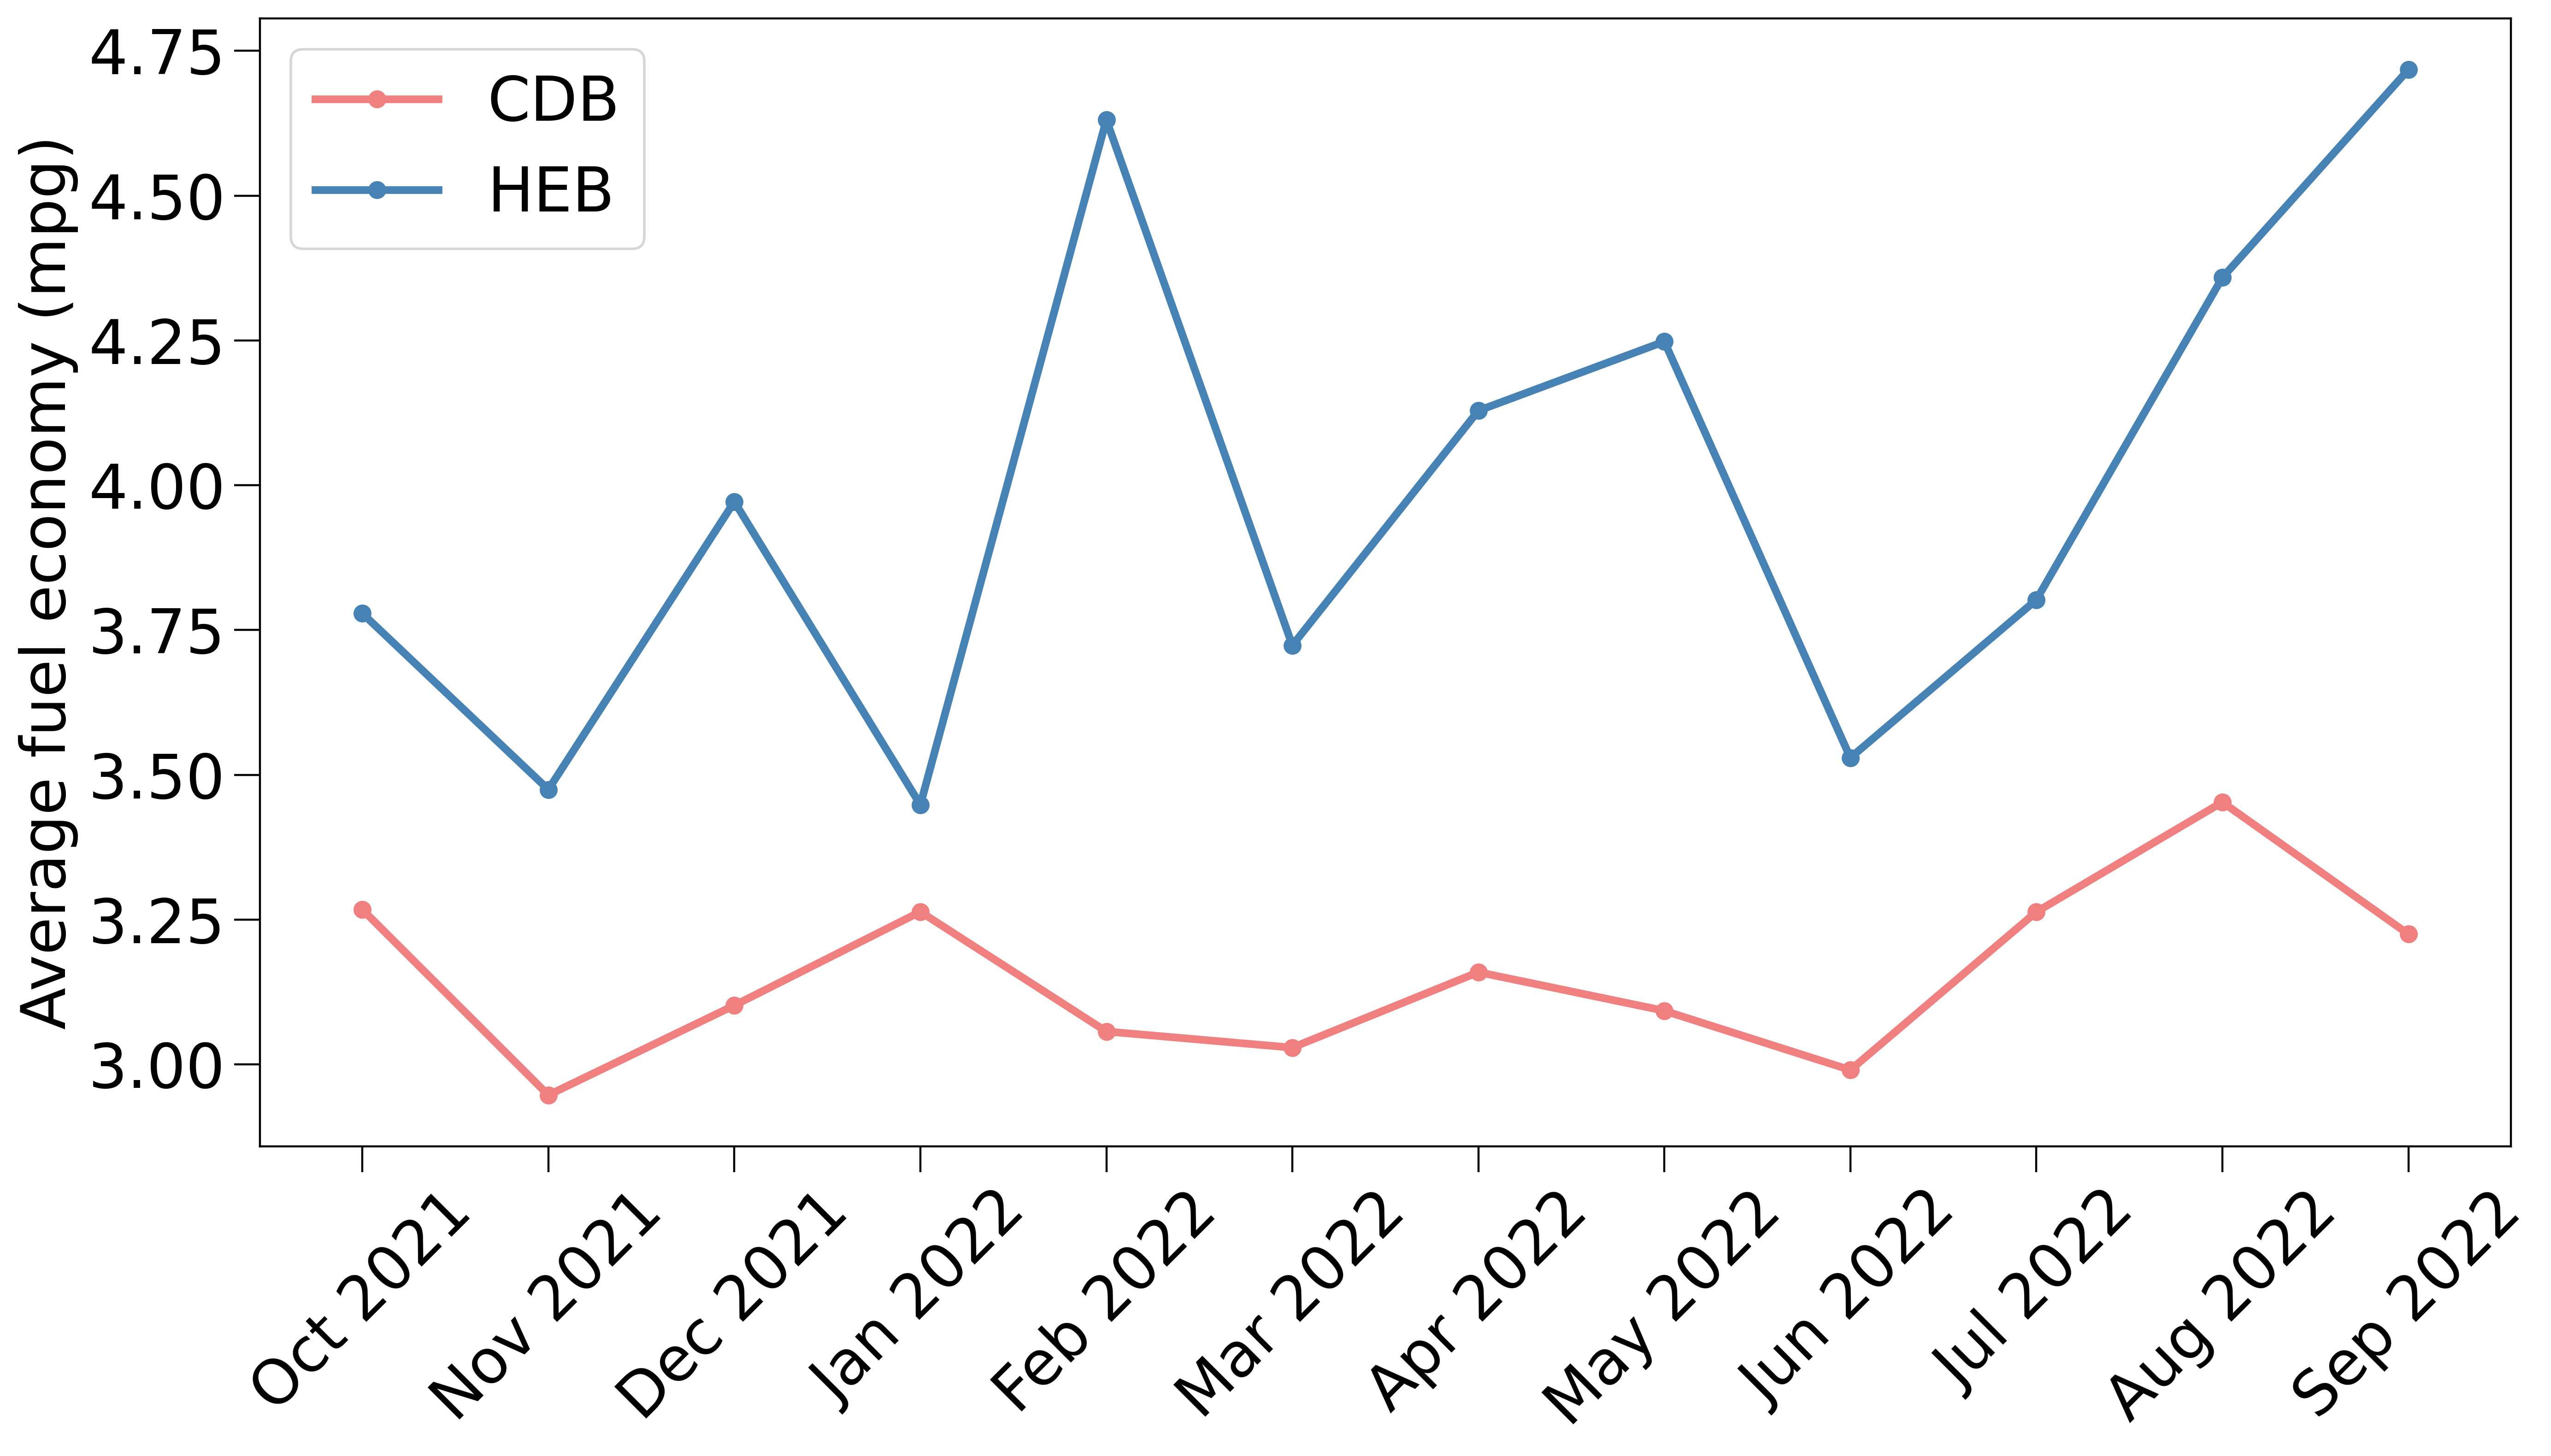

In [35]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 8), dpi=400)

# Define the colors for each powertrain type
powertrain_colors = {
    'conventional': 'lightcoral',
    'hybrid': 'steelblue',
    'electric': 'mediumseagreen'
}

# Plotting each powertrain type with markers
for powertrain in pivot_mpg.columns:
    ax.plot(pivot_mpg.index, pivot_mpg[powertrain], color=powertrain_colors[powertrain], marker='o',  lw=3, 
            label='CDB' if powertrain == 'conventional' else 'HEB')

# Adding labels and title
ax.set_ylabel('Average fuel economy (mpg)', fontsize=24)

# Customize the legend
ax.legend(fontsize=24)

# Increase size of tick marks and labels
tick_mark_size = 10  # Adjust as needed
tick_label_size = 24  # Adjust as needed

# Setting x-axis labels to month-year
ax.set_xticks(np.arange(len(month_order_with_year)))
ax.set_xticklabels(month_order_with_year, rotation=45, fontsize=24)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='both', labelsize=tick_label_size, length=tick_mark_size)  # Adjust both x and y axes


# Adjust layout to fit everything nicely.
plt.tight_layout()

# Save the plot - Make sure to use a valid path
fig.savefig(r'../../figures/mpg-by-powertrain.png', dpi=400, bbox_inches='tight')


# Show the plot
plt.show()

In [15]:
average_conventional = pivot_mpg['conventional'].mean()
print('average_conventional',average_conventional)
average_hybrid = pivot_mpg['hybrid'].mean()
print('average_hybrid',average_hybrid)


average_conventional 3.154032527549978
average_hybrid 3.9843650408386484
